# Part1 Data Preprocessing

Data link : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


## import libaries and dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv("data//data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Explore

In [4]:
data.shape

(569, 33)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [7]:
len(data.select_dtypes(include='object').columns)

1

In [8]:
data.select_dtypes(include=['float64','int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
len(data.select_dtypes(include=['float64','int64']).columns)

32

In [10]:
## statistical summry
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Dealing with missing value

In [12]:
data.isnull().values.any()

True

In [13]:
data.isnull().values.sum()

569

In [14]:
data.columns[data.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [15]:
len(data.columns[data.isnull().any()])

1

In [16]:
data['Unnamed: 32'].count()

0

In [17]:
data=data.drop(columns='Unnamed: 32')

In [18]:
data.shape

(569, 32)

In [19]:
data.isnull().values.any()

False

Dealing with Categorical Data

In [20]:
data.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [21]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [22]:
data['diagnosis'].nunique()

2

In [23]:
##One hot encoding
data = pd.get_dummies(data=data, drop_first=True)

data.head()

CountPlot

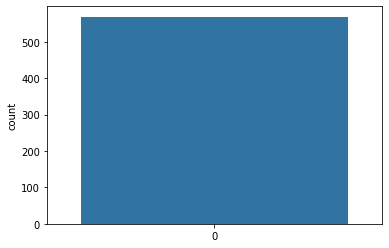

In [24]:
sns.countplot(data['diagnosis_M'],label = 'count')
plt.show()

In [25]:
# B (0) values
(data.diagnosis_M == 0 ).sum()

357

In [26]:
# M (1) values
(data.diagnosis_M == 1 ).sum() 

212

Correlation matrix and heatmap

In [27]:
data_2 =data.drop(columns='diagnosis_M')

In [28]:
data_2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot: title={'center': 'Correlected with diagnosis_M'}>

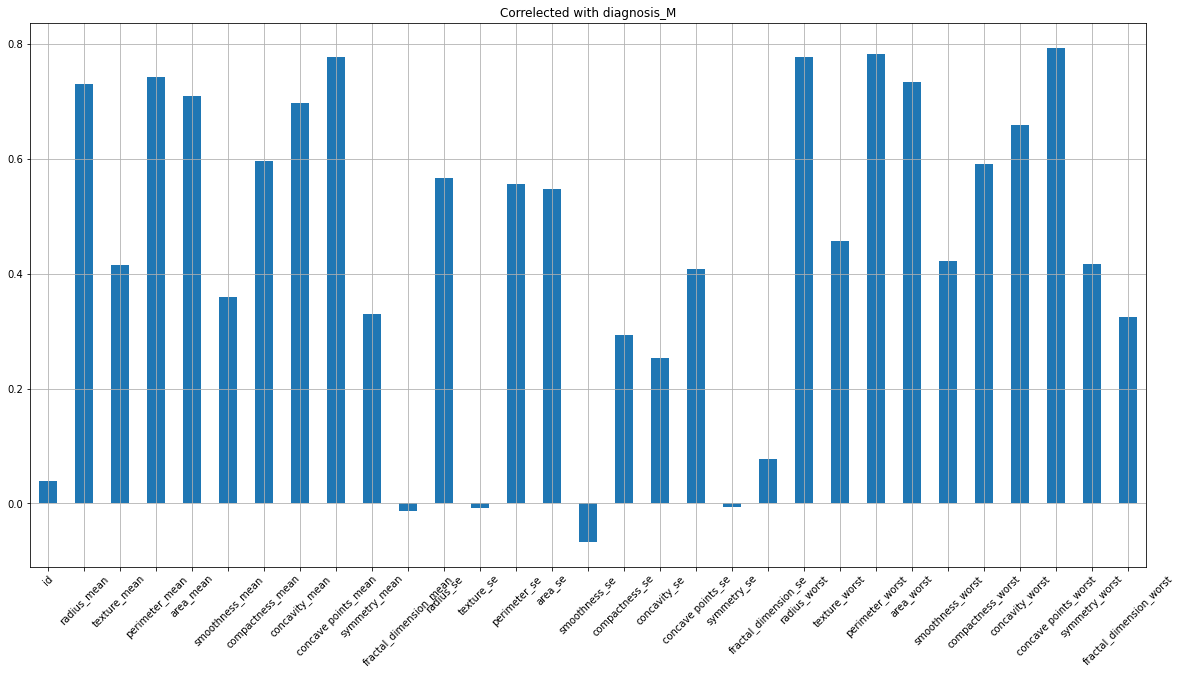

In [29]:
data_2.corrwith(data['diagnosis_M']).plot.bar(
    figsize = (20,10), title = "Correlected with diagnosis_M",rot=45,grid=True
)

In [30]:
# CORRLETION Metrix
corr = data.corr()

In [31]:
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


<AxesSubplot: >

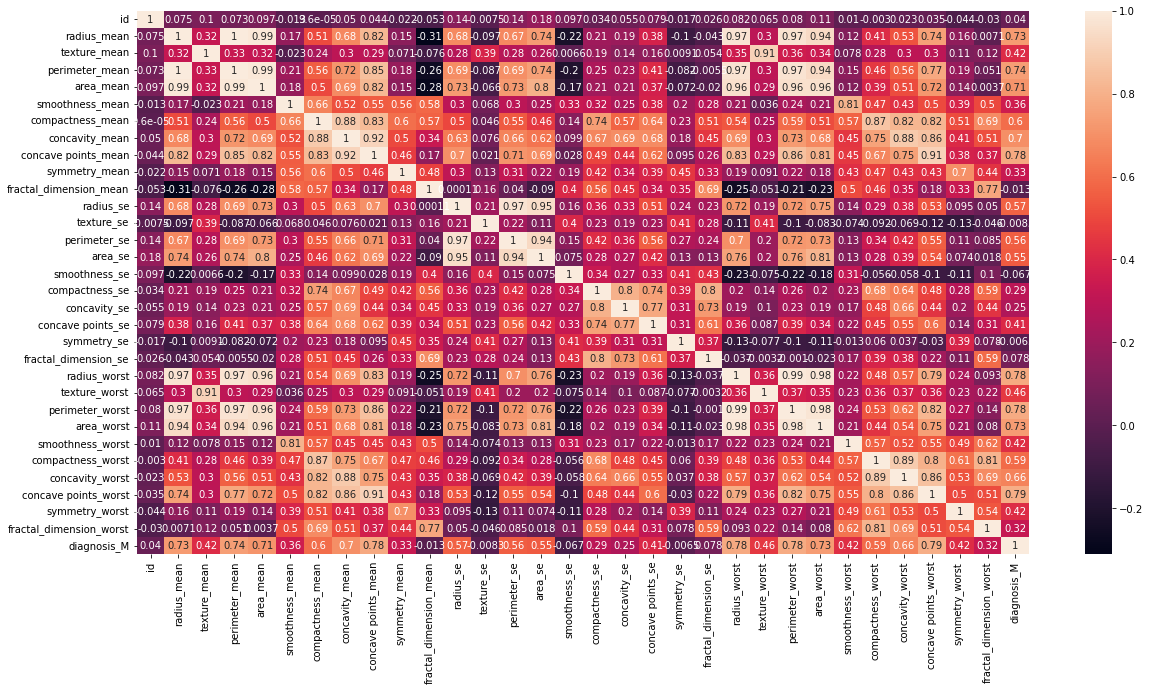

In [32]:
# HEATmAP
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot=True)

Spliting the Dataset train and test set

In [33]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [34]:
## matrix of features of independant verible
x = data.iloc[:,1:-1].values

In [35]:
x.shape

(569, 30)

In [36]:
## target / dependend verible
y = data.iloc[:,-1].values

In [37]:
y.shape

(569,)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

In [40]:
x_train .shape

(455, 30)

In [41]:
x_train.shape

(455, 30)

In [42]:
y_test.shape

(114,)

In [43]:
y_train.shape

(455,)

Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc =StandardScaler()

In [46]:
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(X_test)

In [47]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [48]:
x_test

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

# Part-2 : Building The Model

1) Logestic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
classifir_lr = LogisticRegression(random_state= 0)

In [51]:
classifir_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [52]:
y_pred = classifir_lr.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, precision_score, recall_score

In [54]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)


In [55]:
result = pd.DataFrame([['LogisticRegression',acc, f1, prec, rec]], 
                      columns= ['Model','Accuracy','F1_Score', 'Precion', 'Recall'])

In [56]:
result

,Model,Accuracy,F1_Score,Precion,Recall
0,LogisticRegression,0.95614,0.946237,0.956522,0.93617


In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  2]
 [ 3 44]]


Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
accuracies = cross_val_score(estimator=classifir_lr,X= x_train, y=y_train , cv =10)

In [60]:
print("Accuracy is {:.2f}%" . format(accuracies.mean()*100))
print("StandardScaler Deviation is {:.2f} %".format(accuracies.std()* 100))

Accuracy is 97.81%
StandardScaler Deviation is 1.98 %


2 Random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
classifier_rm =RandomForestClassifier(random_state=0)
classifier_rm.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [63]:
y_pred = classifier_rm.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score, precision_score, recall_score

In [65]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [66]:
model_result = pd.DataFrame([['RandomForest',acc, f1, prec, rec]], 
                      columns= ['Model','Accuracy','F1_Score', 'Precion', 'Recall'])

In [67]:
result = result.append(model_result, ignore_index= True)

/tmp/ipykernel_17513/240783431.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(model_result, ignore_index= True)


In [68]:
result

,Model,Accuracy,F1_Score,Precion,Recall
0,LogisticRegression,0.956140,0.946237,0.956522,0.936170
1,RandomForest,0.973684,0.967742,0.978261,0.957447


In [69]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  1]
 [ 2 45]]


### Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rm,X= x_train, y=y_train , cv =10)
print("Accuracy is {:.2f}%" . format(accuracies.mean()*100))
print("StandardScaler Deviation is {:.2f} %".format(accuracies.std()* 100))

Accuracy is 96.05%
StandardScaler Deviation is 3.07 %


# Part 3 Randomized Search to find the best Parameter(Logistic regression)

In [71]:
from  sklearn.model_selection import  RandomizedSearchCV

In [72]:
#penalty{‘l1’, ‘l2’, ‘elasticnet’, None},

parameters = {
    'penalty' : ['l1', 'l2','none'] ,
    'C' : [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
    'solver' :  ['newton-cg', 'lbfgs',  'sag', 'saga'], 
    
}

In [73]:
parameters

{'penalty': ['l1', 'l2', 'none'],
 'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

In [74]:
random_search = RandomizedSearchCV(estimator= classifir_lr, param_distributions= parameters, n_iter= 10, 
                                   scoring= 'roc_auc', n_jobs= -1, cv= 10, verbose= 3, random_state=10)

In [75]:
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag

/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag

/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_log

/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/shaloof/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/shaloof/.local/lib/

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'saga']},
                   random_state=10, scoring='roc_auc', verbose=3)

In [76]:
random_search.best_estimator_

LogisticRegression(C=0.75, penalty='none', random_state=0, solver='saga')

In [77]:
random_search.best_score_

0.9960953346855984

In [78]:
random_search.best_params_

{'solver': 'saga', 'penalty': 'none', 'C': 0.75}

# Part4) Final model  (Logestic regression)

In [80]:
from sklearn.linear_model import LogisticRegression
classifir= LogisticRegression(random_state= 0,solver='saga',penalty='none',C= 0.75)
classifir.fit(x_train, y_train)

/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.75, penalty='none', random_state=0, solver='saga')

[CV 1/10] END .C=0.75, penalty=none, solver=sag;, score=0.990 total time=   0.0s
[CV 6/10] END .C=1.25, penalty=none, solver=sag;, score=0.991 total time=   0.0s
[CV 8/10] END .C=1.25, penalty=none, solver=sag;, score=1.000 total time=   0.0s
[CV 10/10] END C=1.25, penalty=none, solver=sag;, score=1.000 total time=   0.0s
[CV 2/10] END ..C=0.25, penalty=l1, solver=saga;, score=0.980 total time=   0.1s
[CV 4/10] END ..C=0.25, penalty=l1, solver=saga;, score=0.998 total time=   0.2s
[CV 7/10] END ..C=0.25, penalty=l1, solver=saga;, score=1.000 total time=   0.2s
[CV 8/10] END ..C=0.25, penalty=l1, solver=saga;, score=1.000 total time=   0.1s
[CV 10/10] END .C=0.25, penalty=l1, solver=saga;, score=1.000 total time=   0.1s
[CV 1/10] END C=0.75, penalty=none, solver=saga;, score=1.000 total time=   0.0s
[CV 3/10] END C=0.75, penalty=none, solver=saga;, score=1.000 total time=   0.0s
[CV 4/10] END C=0.75, penalty=none, solver=saga;, score=0.998 total time=   0.0s
[CV 6/10] END C=0.75, penalt

In [84]:
y_pred = classifir.predict(x_test)

cc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_result = pd.DataFrame([['Final Logestic Regression',acc, f1, prec, rec]], 
                      columns= ['Model','Accuracy','F1_Score', 'Precion', 'Recall'])



In [85]:
result = result.append(model_result, ignore_index= True)
result

/tmp/ipykernel_17513/3966579869.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(model_result, ignore_index= True)


,Model,Accuracy,F1_Score,Precion,Recall
0,LogisticRegression,0.956140,0.946237,0.956522,0.936170
1,RandomForest,0.973684,0.967742,0.978261,0.957447
2,RandomForest,0.973684,0.946237,0.956522,0.936170
3,Final Logestic Regression,0.973684,0.946237,0.956522,0.936170


## Cross validation

In [87]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifir,X= x_train, y=y_train , cv =10)
print("Accuracy is {:.2f}%" . format(accuracies.mean()*100))
print("StandardScaler Deviation is {:.2f} %".format(accuracies.std()* 100))

/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag

Accuracy is 98.02%
StandardScaler Deviation is 2.08 %


/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/shaloof/.local/lib/python3.10/site-packages/sklearn/linear_model/_log

## Part 5 : Predicting a single Observation

In [88]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [95]:
single_obs = [[17.99,	10.38	,122.80,	1001.0,	0.11840,	0.27760,	0.3001,	0.14710,	0.2419,	17.33,	184.60,	2019.0,	0.1622,	0.6656,	0.7119,	0.2654,	0.4601,	0.11890]]

In [96]:
single_obs

[[17.99,
  10.38,
  122.8,
  1001.0,
  0.1184,
  0.2776,
  0.3001,
  0.1471,
  0.2419,
  17.33,
  184.6,
  2019.0,
  0.1622,
  0.6656,
  0.7119,
  0.2654,
  0.4601,
  0.1189]]